In [46]:
import pandas as pd
import numpy as np
import missingno as msno

In [7]:
file_veterans = "Veterans - a year of data (June 2023).xlsx"
file_non_veterans = "Non-veterans - comparison group (June 2023).xlsx"

sheet_name = "MergedSheet"

df_veterans = pd.read_excel(file_veterans, sheet_name=sheet_name)
df_non_veterans = pd.read_excel(file_non_veterans, sheet_name=sheet_name)


In [10]:
df_veterans.shape

(29361, 65)

In [11]:
df_non_veterans.shape

(29380, 37)

In [8]:
df_veterans.describe()

,Session ID,Appreciation of Beauty & Excellence,Appreciation of Beauty & Excellence Rank,Bravery,Bravery Rank,Love,Love Rank,Prudence,Prudence Rank,Teamwork,...,Perspective,Perspective Rank,Self-Regulation,Self-Regulation Rank,Social Intelligence,Social Intelligence Rank,Spirituality,Spirituality Rank,Zest,Zest Rank
count,2.936100e+04,29361.000000,29361.000000,29361.000000,29361.000000,29361.000000,29361.000000,29361.000000,29361.000000,29361.000000,...,29361.000000,29361.000000,29361.000000,29361.000000,29361.000000,29361.000000,29361.000000,29361.000000,29361.000000,29361.000000
mean,2.549705e+07,3.722489,13.764177,3.706618,13.930282,3.621879,12.212901,3.625515,15.261061,3.727581,...,3.884830,12.173053,3.383246,17.215422,3.791339,13.530500,3.448188,14.003712,3.370432,18.180682
std,1.205879e+06,0.787125,6.777842,0.713328,6.231764,0.913350,7.673902,0.787148,6.492686,0.686995,...,0.672846,6.058175,0.812242,5.757936,0.672589,5.619682,1.010499,7.965035,0.825598,5.441410
min,2.344873e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.443801e+07,3.250000,8.000000,3.250000,9.000000,3.000000,5.000000,3.000000,10.000000,3.250000,...,3.500000,7.000000,3.000000,13.000000,3.500000,9.000000,2.750000,6.000000,2.750000,15.000000
50%,2.553503e+07,3.750000,14.000000,3.750000,14.000000,3.750000,12.000000,3.750000,16.000000,3.750000,...,4.000000,12.000000,3.500000,19.000000,3.750000,14.000000,3.500000,15.000000,3.500000,20.000000
75%,2.654172e+07,4.250000,20.000000,4.250000,19.000000,4.250000,19.000000,4.250000,21.000000,4.250000,...,4.250000,17.000000,4.000000,22.000000,4.250000,18.000000,4.250000,22.000000,4.000000,23.000000
max,2.753548e+07,5.000000,24.000000,5.000000,24.000000,5.000000,24.000000,5.000000,24.000000,5.000000,...,5.000000,24.000000,5.000000,24.000000,5.000000,24.000000,5.000000,24.000000,5.000000,24.000000


In [9]:
df_veterans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29361 entries, 0 to 29360
Data columns (total 65 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Session ID                                                                29361 non-null  int64  
 1   What is your current employment status?                                   29170 non-null  object 
 2   What is your occupation?                                                  29083 non-null  object 
 3   Which of the following best describes your role in your industry?         28727 non-null  object 
 4   Where are you located?                                                    29289 non-null  object 
 5   What is your date of birth?                                               25150 non-null  object 
 6   Which of the following group(s) do you fall into?             

In [22]:
df_non_veterans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29380 entries, 0 to 29379
Data columns (total 37 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Session ID                                                                29380 non-null  int64  
 1   What is your current employment status?                                   29323 non-null  object 
 2   Where are you located?                                                    28968 non-null  object 
 3   What is your date of birth?                                               27316 non-null  object 
 4   Which of the following group(s) do you fall into?                         29002 non-null  object 
 5   How do you identify your gender?                                          29205 non-null  object 
 6   What is your highest level of education?                      

In [20]:
similar_columns = df_veterans.columns.intersection(df_non_veterans.columns)
similar_columns

Index(['Session ID', 'What is your current employment status?',
       'Where are you located?', 'What is your date of birth?',
       'Which of the following group(s) do you fall into? ',
       'How do you identify your gender?',
       'What is your highest level of education?',
       'What is your current marital status?',
       'How many children under 18 years old live in your household?',
       'What is your zip/postal code?',
       'What is your total annual household income',
       'Are you experiencing any of the following? (Please check all that apply)',
       'Are you currently experiencing homelessness?',
       'Appreciation of Beauty & Excellence', 'Bravery', 'Love', 'Prudence',
       'Teamwork', 'Creativity', 'Curiosity', 'Fairness', 'Forgiveness',
       'Gratitude', 'Honesty', 'Hope', 'Humor', 'Perseverance ', 'Judgment',
       'Kindness', 'Leadership', 'Love of Learning', 'Humility', 'Perspective',
       'Self-Regulation', 'Social Intelligence', 'Spiritualit

In [21]:
len(similar_columns)

37

In [33]:
pd.set_option('display.max_rows', 100)

# get the number of missing data points per column
missing_values_count = df_veterans.isnull().sum()
missing_values_count

Session ID                                                                      0
What is your current employment status?                                       191
What is your occupation?                                                      278
Which of the following best describes your role in your industry?             634
Where are you located?                                                         72
What is your date of birth?                                                  4211
Which of the following group(s) do you fall into?                             574
How do you identify your gender?                                              369
What is your highest level of education?                                      398
What is your current marital status?                                         1315
How many children under 18 years old live in your household?                 1287
What is your zip/postal code?                                                2505
What is your tot

In [57]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'No of Missing Values', 1 : '% of Missing Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Missing Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [58]:
df_veterans_missing = missing_values_table(df_veterans)
df_veterans_missing

Your selected dataframe has 65 columns.
There are 14 columns that have missing values.


,No of Missing Values,% of Missing Values
Are you experiencing any of the following? (Please check all that apply),18841,64.2
What is your date of birth?,4211,14.3
What is your zip/postal code?,2505,8.5
What is your total annual household income,1988,6.8
What is your current marital status?,1315,4.5
How many children under 18 years old live in your household?,1287,4.4
Which of the following best describes your role in your industry?,634,2.2
Which of the following group(s) do you fall into?,574,2.0
Are you currently experiencing homelessness?,434,1.5
What is your highest level of education?,398,1.4


In [59]:
df_non_veterans_missing = missing_values_table(df_non_veterans)
df_non_veterans_missing

Your selected dataframe has 37 columns.
There are 12 columns that have missing values.


,No of Missing Values,% of Missing Values
Are you experiencing any of the following? (Please check all that apply),22123,75.3
What is your zip/postal code?,3576,12.2
What is your total annual household income,3318,11.3
What is your date of birth?,2064,7.0
What is your current marital status?,1405,4.8
How many children under 18 years old live in your household?,1353,4.6
Where are you located?,412,1.4
Which of the following group(s) do you fall into?,378,1.3
What is your highest level of education?,292,1.0
How do you identify your gender?,175,0.6


<Axes: >

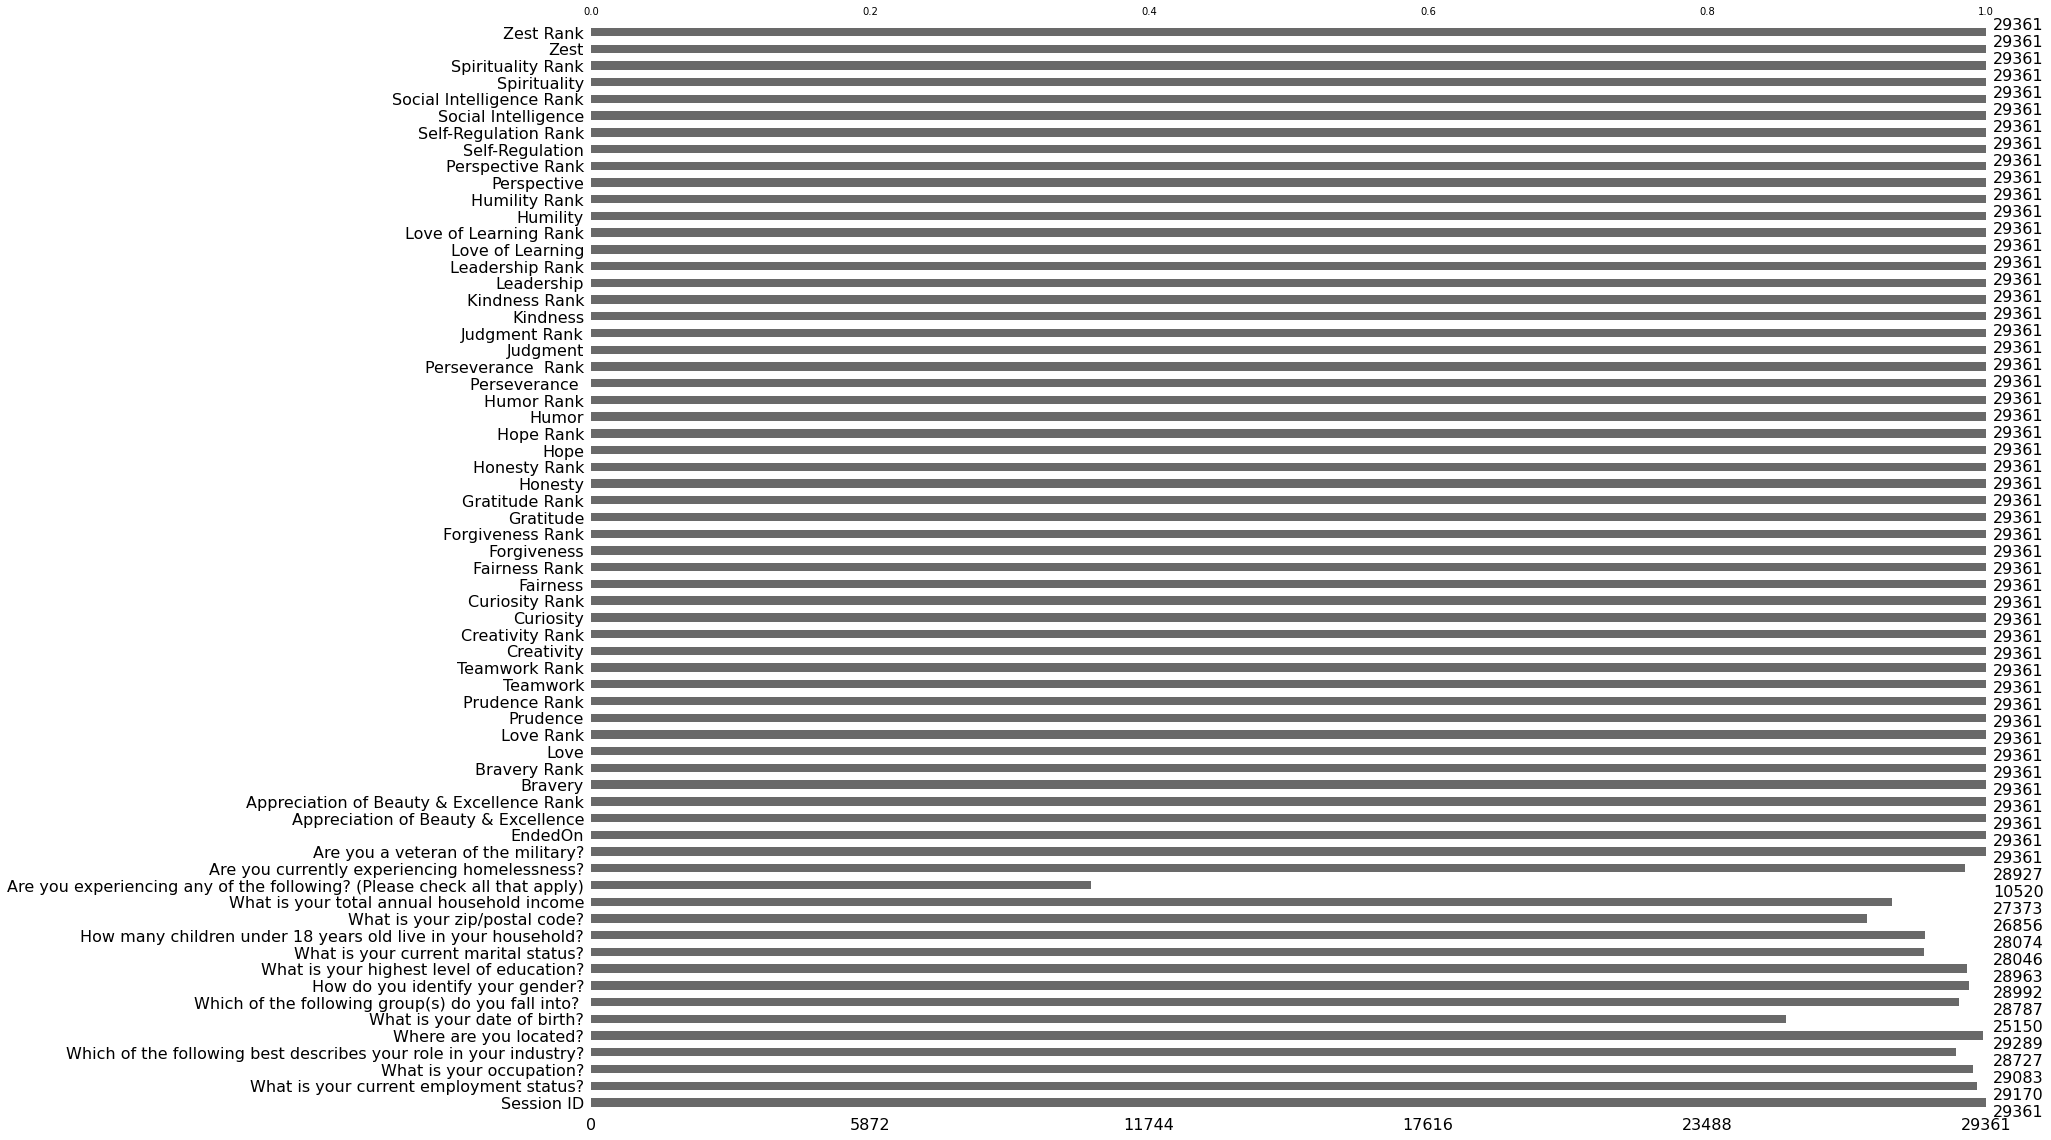

In [60]:
msno.bar(df_veterans)

<Axes: >

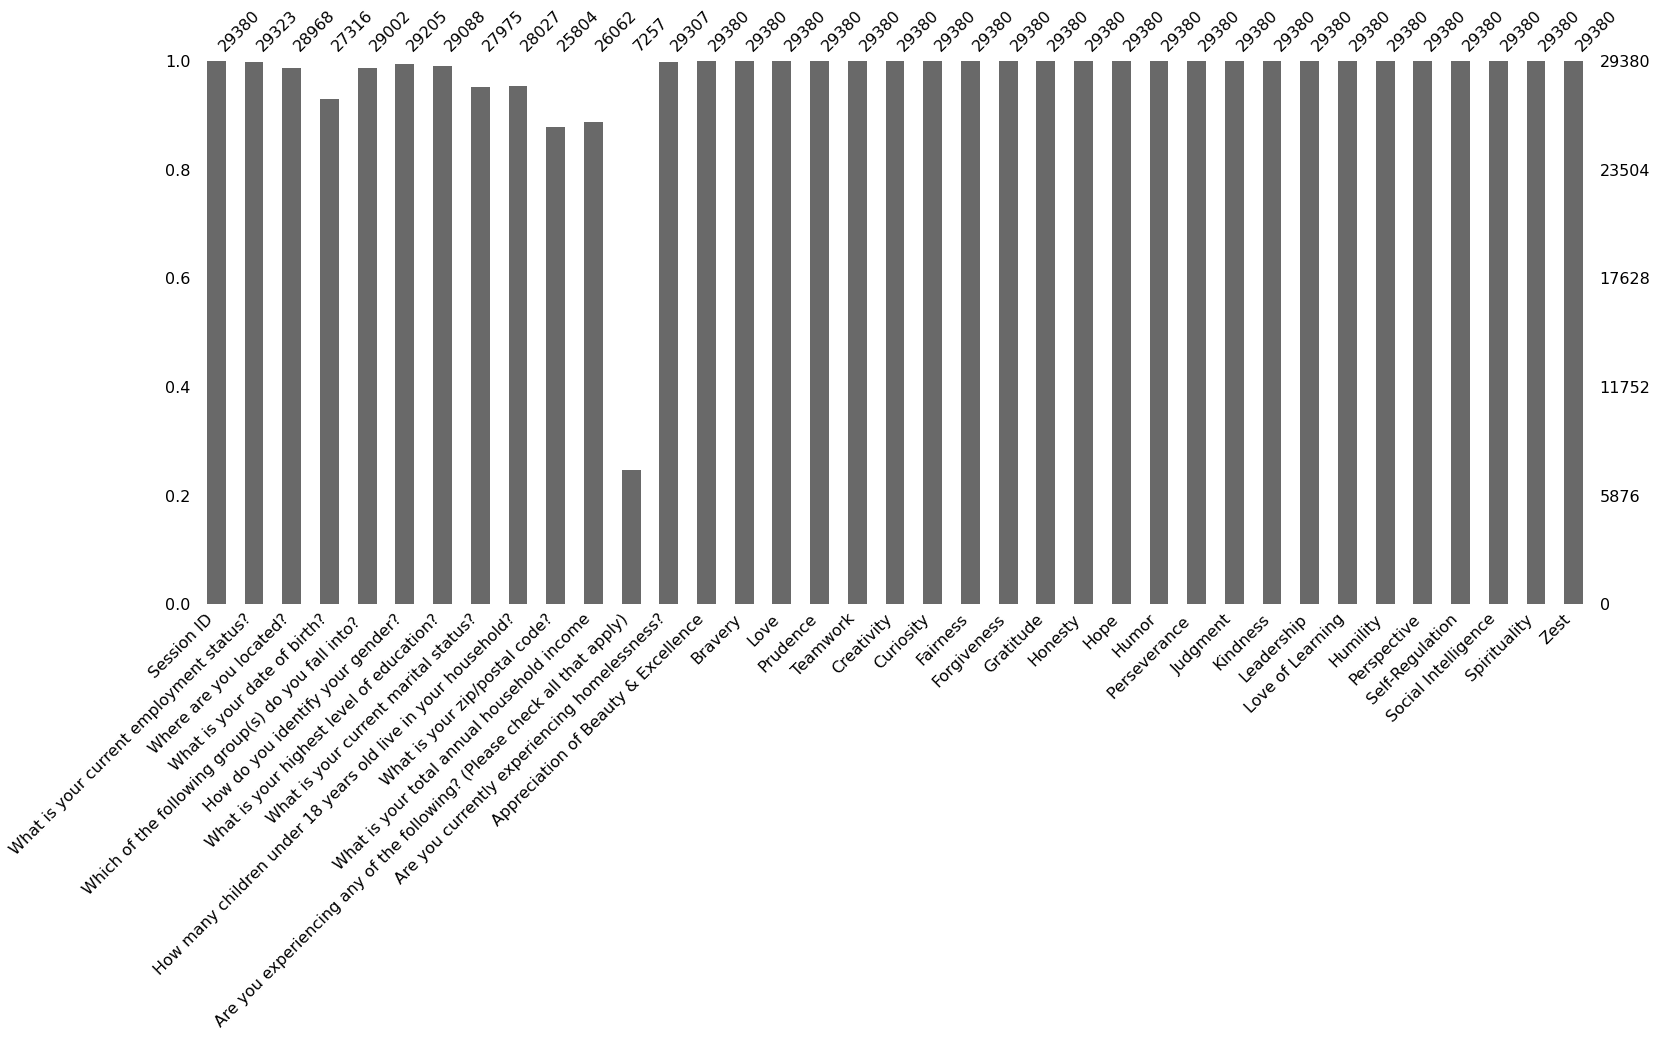

In [61]:
msno.bar(df_non_veterans)